In [35]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass19_data = []
mass20_data = []

In [33]:
mass_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190501", "edate" : "20191201", "state" : Massachusetts}

# Call to url
mass_response = requests.get(annual_data_url, params = mass_params).json()


In [34]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(sample_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


NameError: name 'sample_data_url' is not defined

In [ ]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [ ]:
cali_df.isnull()

In [ ]:
cali_df.nsmallest(3, 'first_max_value')

In [ ]:
# Create a DataFrame for Hawaii and pull carbon monoxide data from API
hawaii_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Hawaii}

# Call to url
hawaii_response = requests.get(sample_data_url, params = hawaii_params).json()
hawaii_data.append(hawaii_response)

hawaii_df = pd.DataFrame(hawaii_data[0]["Data"])
hawaii_df.head()

In [ ]:
# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(sample_data_url, params = dc_params).json()
dc_data.append(dc_response)

dc_df = pd.DataFrame(dc_data[0]["Data"])
dc_df.head()

In [ ]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()

In [80]:
# Create a DataFrame for Mass and pull carbon monoxide data from API

# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass19_response = requests.get(daily_data_url, params = mass_params19).json()
mass19_data.append(mass19_response)

mass19_df = pd.DataFrame(mass19_data[0]["Data"])

#2020
mass_params20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass20_response = requests.get(daily_data_url, params = mass_params20).json()
mass20_data.append(mass20_response)

mass20_df = pd.DataFrame(mass20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_df = mass19_df.append(mass20_df)
# merge_mass_df

In [77]:
# Drop unnecessary columns to clean DF
clean_mass_df = merge_mass_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

# Filter out the 1-hour sample_duration and fix any null values
sample_duration = clean_mass_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_mass_df = clean_mass_df[sample_duration]

# Groupby date and fix null values
group_mass = pd.DataFrame(clean_mass_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)


In [78]:
# Convert the date_local in the index into 'datetime' format
group_mass.index = pd.to_datetime(group_mass.index)

# Average out data on a per month basis
mass_monthly = group_mass.resample('M').mean()
mass_monthly.head()

latitude                        longitude                        \
county        Hampden    Suffolk  Worcester    Hampden    Suffolk  Worcester   
date_local                                                                     
2019-04-30  42.120229  42.329212  42.263955 -72.584503 -71.080831 -71.794322   
2019-05-31  42.120229  42.328943  42.263955 -72.584503 -71.079176 -71.794322   
2019-06-30        NaN  42.329500  42.263955        NaN -71.082600 -71.794322   
2019-07-31  42.120229  42.328804  42.263955 -72.584503 -71.078320 -71.794322   
2019-08-31  42.120229  42.328456  42.263955 -72.584503 -71.076179 -71.794322   

           arithmetic_mean                     first_max_value            \
county             Hampden   Suffolk Worcester         Hampden   Suffolk   
date_local                                                                 
2019-04-30        0.368853  0.205066  0.224176        0.541667  0.251667   
2019-05-31        0.557143  0.192345  0.218164        0.600000  0.258065   
2019-06-30             NaN  0.196816  0.205609             NaN  0.253333   
2019-07-31        0.346154  0.205385  0.218649        0.428571  0.264516   
2019-08-31        0.308102  0.162287  0.255639        0.350000  0.225806   

                     first_max_hour                           aqi            \
county     Worcester        Hampden   Suffolk Worcester   Hampden   Suffolk   
date_local                                                                    
2019-04-30  0.280769       9.833333  4.550000  8.115385  6.166667  2.616667   
2019-05-31  0.282143       1.000000  7.612903  7.071429  7.000000  2.677419   
2019-06-30  0.257143            NaN  5.333333  3.892857       NaN  2.666667   
2019-07-31  0.256667       4.000000  6.032258  2.666667  5.142857  2.645161   
2019-08-31  0.293333       4.111111  4.774194  4.300000  3.888889  2.322581   

                      
county     Worcester  
date_local            
2019-04-30  2.846154  
2019-05-31  2.928571  
2019-06-30  2.607143  
2019-07-31  2.566667  
2019-08-31  3.033333

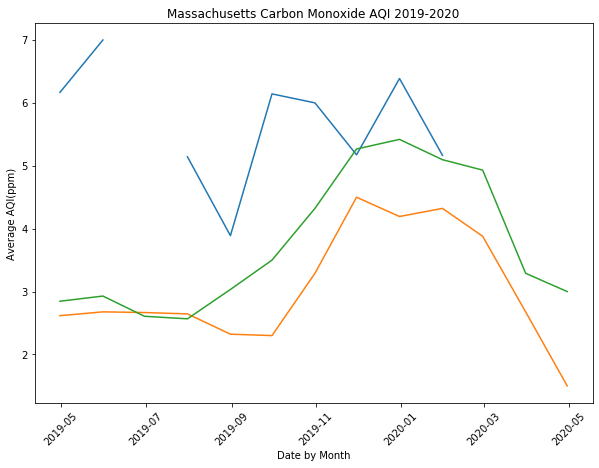

In [108]:
# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly.index
yvalue = mass_monthly['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Carbon Monoxide AQI 2019-2020')
plt.plot(xvalue, yvalue)
